# Seafloor Spreading Bathymetry and Magnetic Anomalies

**Last week we:**
- Loaded and visualized an earthquake catalog.
- Plotted earthquake magnitude and depth.
- Learned some more complicated mapping techinque. 

**Our goals for today:**
- Practice pandas DataFrames, indexing, and data cleaning.
- Load marine geophysical data (bathymetry and marine magnetic anomalies) from two oceanic ridges.
- Select data and drop rows with gaps.
- Plot bathymetry data and evaluate spreading rate.
- Declare a function to detrend and filter magnetic anomaly data.
- Plot marine magnetic anomaly data and compare spreading rates.


## Setup

Run this cell as it is to setup your environment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from cartopy import config
import cartopy.crs as ccrs
from scipy import signal

## Marine Geology, Bathymetry and Magnetic Anomalies

We'll look at marine magnetics and bathymetry data from two surveys, from the Mid-Atlantic Ridge and East Pacific Rise.

First we'll load the Atlantic data (that can be accessed here: https://maps.ngdc.noaa.gov/viewers/geophysics/), and then we'll need to clean them up.

In [2]:
# Load the seafloor depth, marine mag anom data
#columns ['SURVEY_ID','TIMEZONE','DATE','TIME','LAT','LON','POS_TYPE','NAV_QUALCO','BAT_TTIME','CORR_DEPTH','BAT_CPCO','BAT_TYPCO','BAT_QUALCO','MAG_TOT','MAG_TOT2','MAG_RES','MAG_RESSEN','MAG_DICORR','MAG_SDEPTH','MAG_QUALCO','GRA_OBS','EOTVOS','FREEAIR','GRA_QUALCO','LINEID','POINTID']

vanc05mv_data_file = pd.read_table('data_tracks/vanc05mv.m77t')
atlantic_data = vanc05mv_data_file.drop(columns=['SURVEY_ID','TIMEZONE','DATE','TIME','POS_TYPE','NAV_QUALCO',
                                                 'BAT_TTIME','BAT_CPCO','BAT_TYPCO','BAT_QUALCO','MAG_TOT2','MAG_RES',
                                                 'MAG_RESSEN','MAG_DICORR','MAG_SDEPTH','MAG_QUALCO','GRA_OBS','EOTVOS',
                                                 'FREEAIR','GRA_QUALCO','LINEID','POINTID'])
atlantic_data.head()

,LAT,LON,CORR_DEPTH,MAG_TOT
0,-33.03604,-71.62559,NaN,NaN
1,-33.03604,-71.62559,NaN,NaN
2,-33.03604,-71.62559,NaN,NaN
3,-33.03604,-71.62559,NaN,NaN
4,-33.03604,-71.62559,NaN,NaN


In [3]:
atlantic_data.describe()

,LAT,LON,CORR_DEPTH,MAG_TOT
count,26951.000000,26951.000000,25010.000000,14028.000000
mean,-47.071392,-36.939197,3018.086765,26557.261762
std,6.643869,32.681119,1446.118658,1157.487595
min,-56.018980,-76.166600,76.000000,24852.000000
25%,-52.042025,-72.776660,1764.000000,25434.000000
50%,-49.004340,-40.010090,3267.500000,26358.000000
75%,-41.646480,-6.273700,4248.000000,27472.000000
max,-32.989350,18.437850,5370.000000,29206.000000


We'll use `~np.isnan` to select rows were we have depth AND magnetic field measurements.


In [4]:
atlantic_data_clean = atlantic_data[...];
atlantic_data_clean.head()

,LAT,LON,CORR_DEPTH,MAG_TOT
11204,-53.15271,-51.62174,2376.0,29206.0
11205,-53.15178,-51.61709,2394.0,29206.0
11206,-53.15079,-51.61217,2373.0,29205.0
11207,-53.14974,-51.60716,2358.0,29204.0
11208,-53.14873,-51.60215,2332.0,29203.0


In [5]:
atlantic_data_clean.describe()

,LAT,LON,CORR_DEPTH,MAG_TOT
count,14027.000000,14027.000000,14027.000000,14027.00000
mean,-47.720326,-16.801461,3928.335638,26557.35282
std,4.564983,19.269079,794.104704,1157.47861
min,-53.152710,-51.621740,1625.000000,24852.00000
25%,-51.648660,-33.622330,3393.000000,25434.00000
50%,-49.378000,-15.446450,4028.000000,26358.00000
75%,-44.288285,0.384325,4515.000000,27472.00000
max,-37.232890,13.553150,5370.000000,29206.00000


Let's take a look at our data!

<font color=goldenrod>**_Code for you to write_**</font>

**Plot atlantic_data on a map and make it have a linewidth of 2 and a color of orange**

**Plot atlantic_data_clean on the same map and make it have a linewidth of 4 and a color of red**

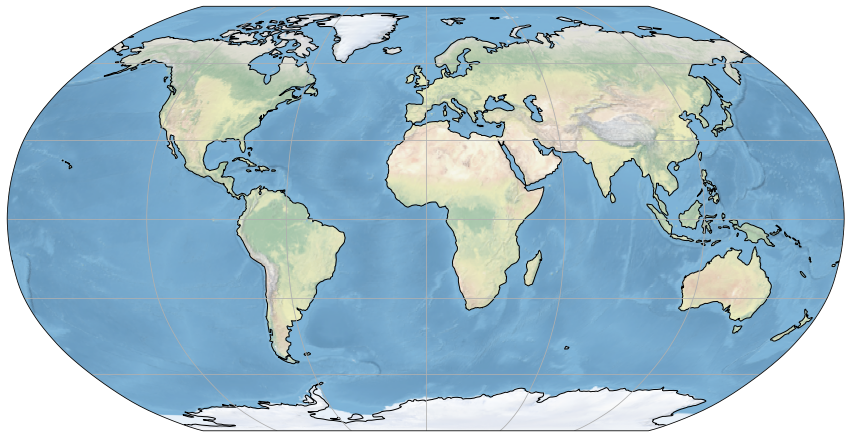

In [6]:
plt.figure(1,(15,15))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()

ax.plot(atlantic_data['LON'],atlantic_data['LAT'],'-',
            color='orange',linewidth=2,transform=ccrs.PlateCarree())

ax.coastlines()
ax.stock_img()
ax.gridlines()

plt.show()

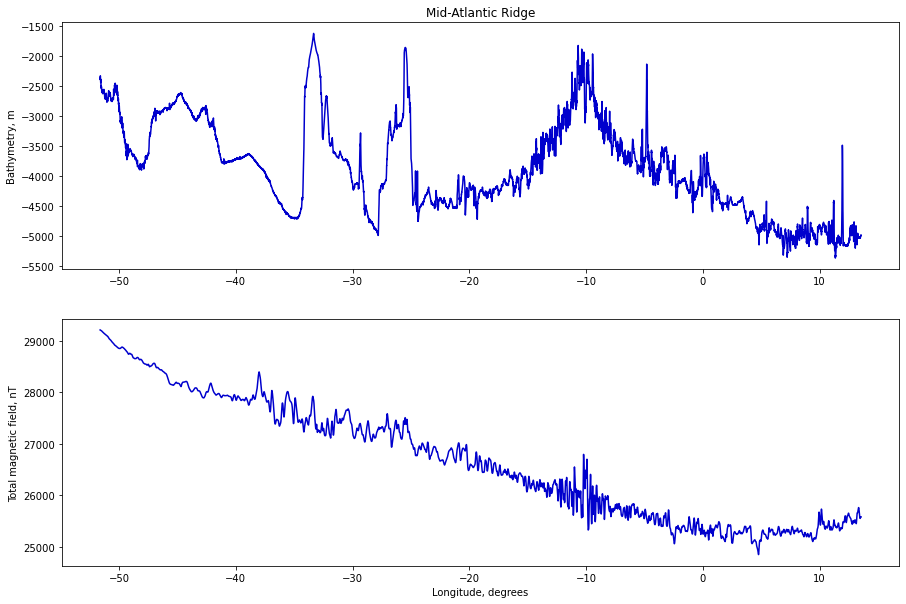

In [7]:
plt.figure(1,(15,10))
ax1=plt.subplot(2, 1, 1)
ax1.plot(atlantic_data_clean['LON'],-1*atlantic_data_clean['CORR_DEPTH'],color='mediumblue');
ax1.set_ylabel('Bathymetry, m');
ax1.set_title('Mid-Atlantic Ridge')

ax2=plt.subplot(2, 1, 2)
ax2.plot(atlantic_data_clean['LON'],atlantic_data_clean['MAG_TOT'],color='mediumblue');
ax2.set_xlabel('Longitude, degrees');
ax2.set_ylabel('Total magnetic field, nT');

Let's just analyze the portion of the survey from around the ridge, so from longitudes -24.0 to 0.0 degrees. So use Boolean indexing to pull out rows of `atlantic_data_clean` where `atlantic_data_clean['LON']` is between those values.

<font color=goldenrod>**_Code for you to write_**</font>

In [8]:
atlantic_data_cropped = 

Here's a map of where our survey line was collected with a grid of seafloor bathymetry in the background.

<img src="Figures/MAR_track_map.png" width=900>

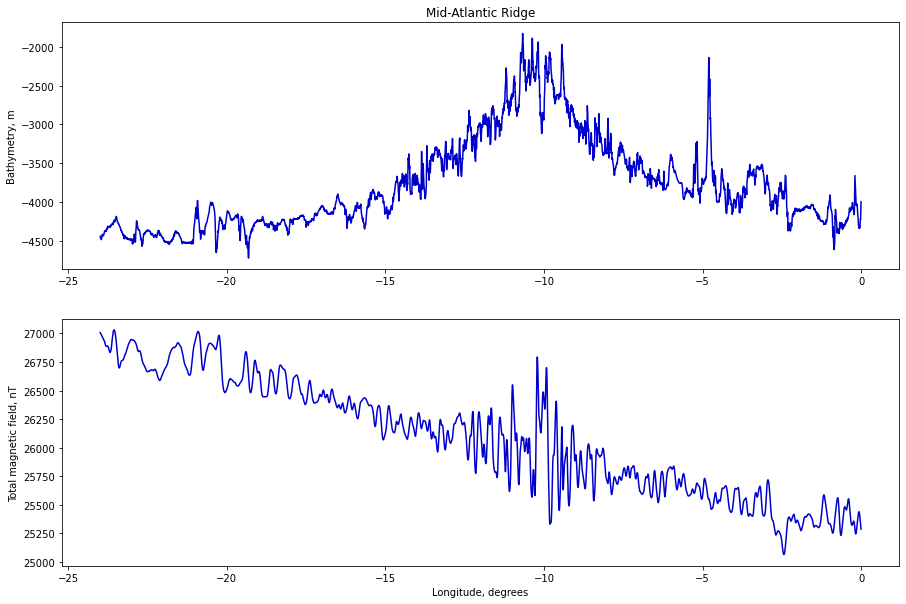

In [9]:
plt.figure(1,(15,10))
ax1=plt.subplot(2, 1, 1)
ax1.plot(atlantic_data_cropped['LON'],-1*atlantic_data_cropped['CORR_DEPTH'],color='mediumblue');
ax1.set_ylabel('Bathymetry, m');
ax1.set_title('Mid-Atlantic Ridge')

ax2=plt.subplot(2, 1, 2)
ax2.plot(atlantic_data_cropped['LON'],atlantic_data_cropped['MAG_TOT'],color='mediumblue');
ax2.set_xlabel('Longitude, degrees');
ax2.set_ylabel('Total magnetic field, nT');

I used another program to project the latitude and longitude coordinates to distance from the ridge along the ship track azimuth -- let's load that. [GMT project](https://docs.generic-mapping-tools.org/6.1/project.html)

In [10]:
projected_atlantic_data = pd.read_csv('data_tracks/projected_vanc05mv.csv',names=['DIST','DEPTH','MAG_TOT'])

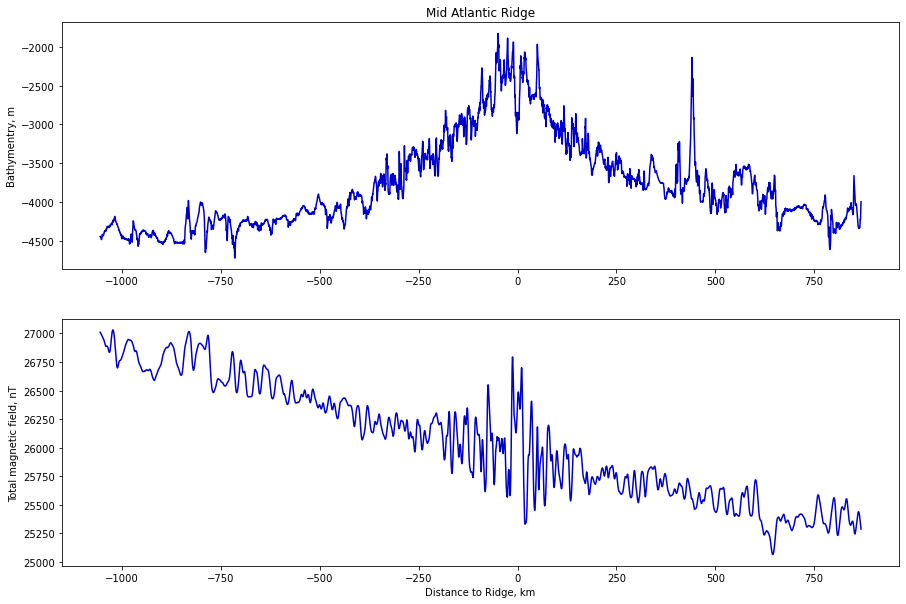

In [11]:
plt.figure(1,(15,10))
ax1=plt.subplot(2, 1, 1)
ax1.plot(projected_atlantic_data['DIST'],-1*projected_atlantic_data['DEPTH'],color='mediumblue');
ax1.set_title('Mid Atlantic Ridge')
ax1.set_ylabel('Bathymentry, m');

ax2=plt.subplot(2, 1, 2)
ax2.plot(projected_atlantic_data['DIST'],projected_atlantic_data['MAG_TOT'],color='mediumblue');
ax2.set_xlabel('Distance to Ridge, km');
ax2.set_ylabel('Total magnetic field, nT');

Now let's load and clean the data from the East Pacific Rise (https://catalog.data.gov/dataset/multibeam-collection-for-nbp9707-multibeam-data-collected-aboard-nathaniel-b-palmer-from-1997-1). This time we'll select date from Longitudes between -126.0 and -95.0 degrees.

In [12]:
# Load the seafloor depth, marine mag anom data
# Source: https://maps.ngdc.noaa.gov/viewers/geophysics/
#names=['SURVEY_ID','TIMEZONE','DATE','TIME','LAT','LON','POS_TYPE','NAV_QUALCO','BAT_TTIME','CORR_DEPTH','BAT_CPCO','BAT_TYPCO','BAT_QUALCO','MAG_TOT','MAG_TOT2','MAG_RES','MAG_RESSEN','MAG_DICORR','MAG_SDEPTH','MAG_QUALCO','GRA_OBS','EOTVOS','FREEAIR','GRA_QUALCO','LINEID','POINTID'])

nbp9707_data_file=pd.read_table('data_tracks/nbp9707.m77t')
pacific_data = nbp9707_data_file.drop(columns=['SURVEY_ID','TIMEZONE','DATE','TIME','POS_TYPE','NAV_QUALCO','BAT_TTIME','BAT_CPCO','BAT_TYPCO','BAT_QUALCO','MAG_TOT2','MAG_RES','MAG_RESSEN','MAG_DICORR','MAG_SDEPTH','MAG_QUALCO','GRA_OBS','EOTVOS','FREEAIR','GRA_QUALCO','LINEID','POINTID'])

pacific_data_clean =  #use ~np.isnan to clear out rows were there are nans
pacific_data_cropped = # use Boolean indexing to select rows with Longitude -126 deg to -95 deg

Here's a map of where our survey line was collected with a grid of seafloor bathymetry in the background.

<img src="Figures/EPR_track_map.png" width=900>

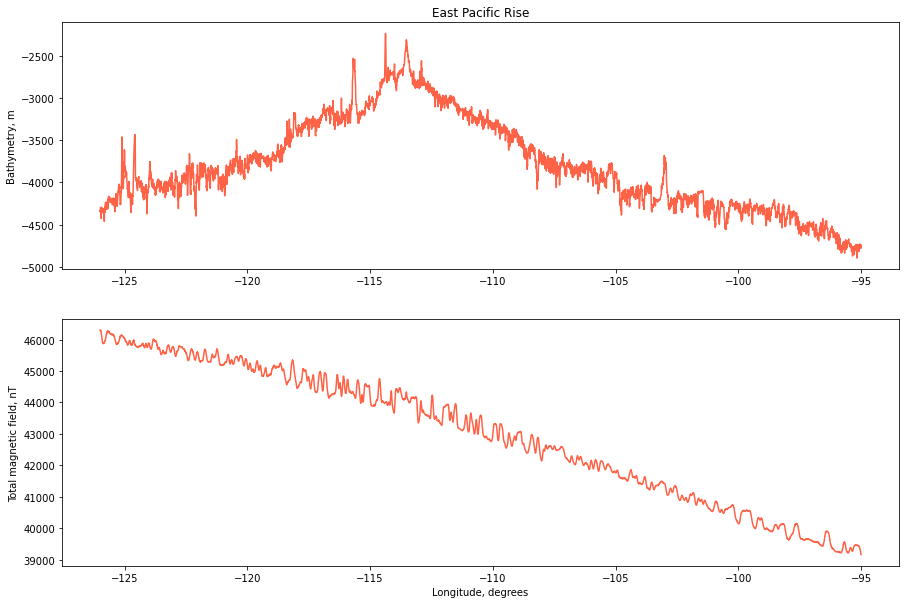

In [13]:
plt.figure(1,(15,10))
ax1=plt.subplot(2, 1, 1)
ax1.plot(pacific_data_cropped['LON'],-1*pacific_data_cropped['CORR_DEPTH'],color='tomato');
ax1.set_ylabel('Bathymetry, m');
ax1.set_title('East Pacific Rise')

ax2=plt.subplot(2, 1, 2)
ax2.plot(pacific_data_cropped['LON'],pacific_data_cropped['MAG_TOT'],color='tomato');
ax2.set_xlabel('Longitude, degrees');
ax2.set_ylabel('Total magnetic field, nT');

Again, I used the GMT (genertic mapping tools) software to project the latitude and longitude coordinates to distance from the ridge along the ship track azimuth -- let's load that. 

In [14]:
projected_pacific_data = pd.read_csv('data_tracks/projected_nbp9707.csv',names=['DIST','DEPTH','MAG_TOT'])

### Bathymetry

Now let's compare the two ridges' bathymetry. 

Let's plot them together on one figure as subplots. Use $\pm$1000 km as the x-axis limits and -5000 to -1500 meters as the y-axis limits for both ridges.

<font color=goldenrod>**_Code for you to write_**</font>

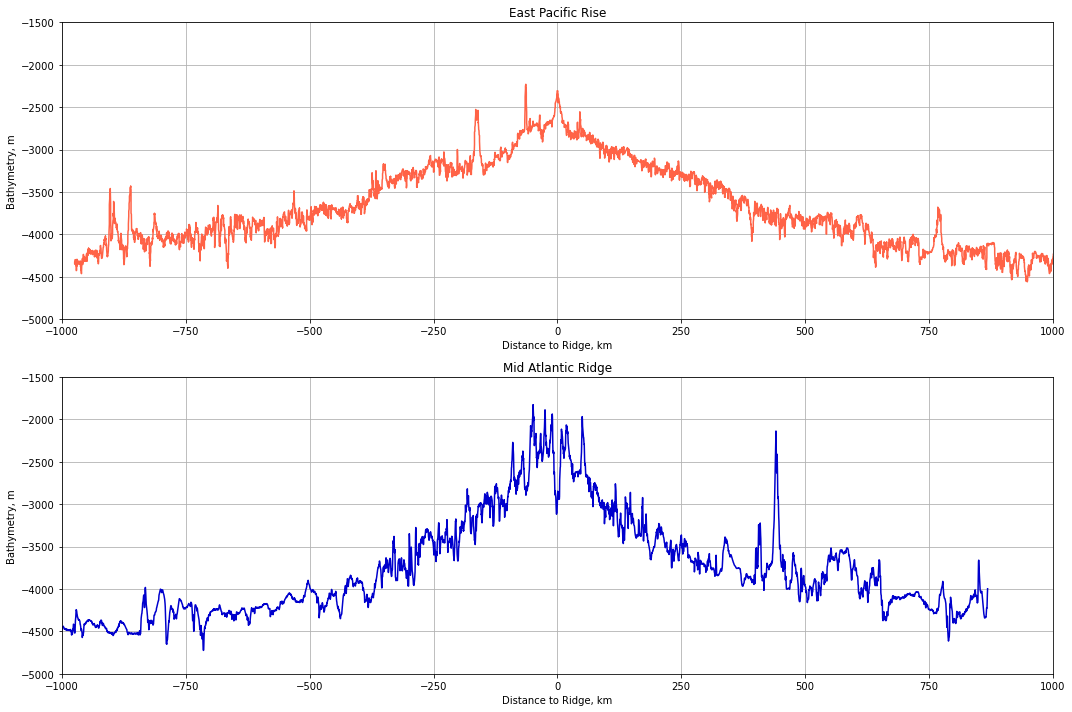

In [15]:
plt.figure(1,(15,10))
ax1 = plt.subplot(2,1,1)
ax1.plot(projected_pacific_data['DIST'],-projected_pacific_data['DEPTH'],color='tomato') # plot the pacific bathymetry
ax1.set_xlim(-1000, 1000) # set the x axis range
ax1.set_ylim(-5000, -1500) # set the y  axis range
ax1.set_xlabel('Distance to Ridge, km') # labels!
ax1.set_ylabel('Bathymetry, m')
ax1.set_title('East Pacific Rise')
ax1.grid()

ax2 = plt.subplot(2,1,2)
ax2.plot(projected_atlantic_data['DIST'],-projected_atlantic_data['DEPTH'],color='mediumblue'); # plot the atlantic bathymetry
ax2.set_xlim(-1000, 1000)
ax2.set_ylim(-5000, -1500)
ax2.set_xlabel('Distance to Ridge, km')
ax2.set_ylabel('Bathymetry, m')
ax2.set_title('Mid Atlantic Ridge')
ax2.grid()

plt.tight_layout()

<img src="Figures/spreading_ridges.png" width=900>
> Source: Essentials of Geology (13th Edition) Lutgens, Tarbuck, and Tasa.

**Discussion Questions:** What do you observe in the bathymetry? Do these ridges have a rift valley at the center? Is the slope steep or gentle? Is the bathymetry rough or smooth?

**Write your answer here.**

Based on the ridge bathymetry, which spreading center do you think is spreading faster the Atlantic (blue) or Pacific (red)?

**Write your answer here.**

### Crustal Magnetic Field

Now let's compare their marine magnetic field data.

Make a plot of the magnetic field from each ridge (['MAG_TOT']). Follow the code above for the bathymetry. Be sure to include axis labels.

```
ax2.set_xlabel('Distance to Ridge, km');
ax2.set_ylabel('Total Field, nT');
ax2.set_title('Mid Atlantic Ridge');
```

<font color=goldenrod>**_Code for you to write_**</font>

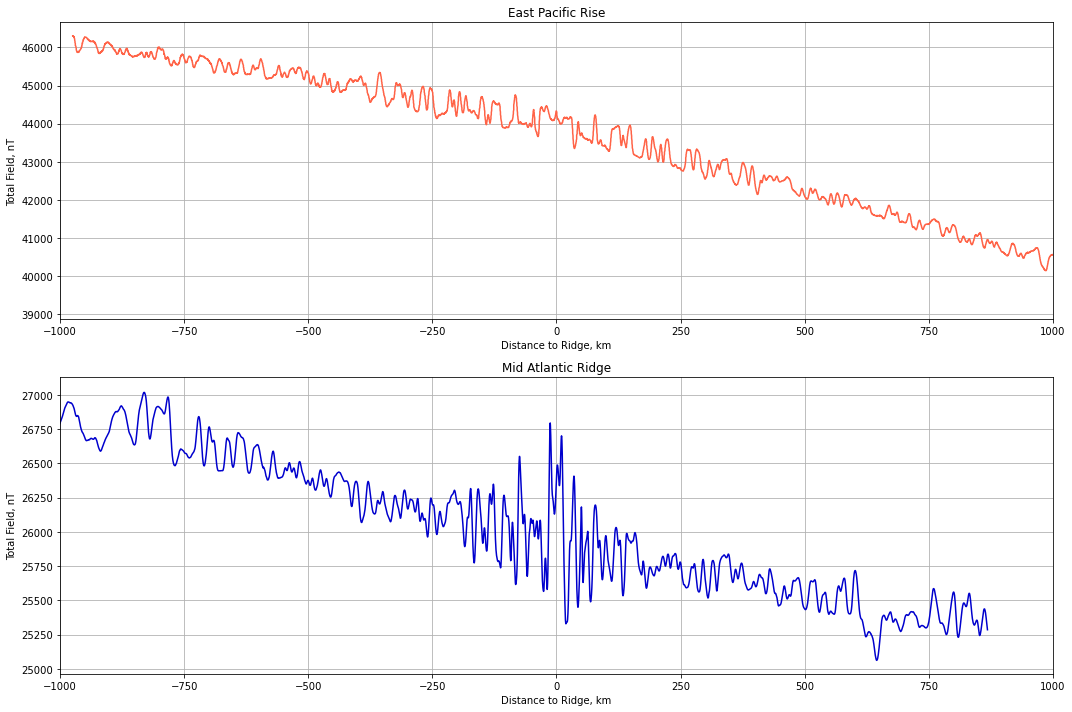

In [16]:
#Plot the magnetic field (follow the depth example)


I'm defining a new function `total2anom` to process these total magnetic field measurements into magnetic anomaly by removing the background drift.

In [17]:
def total_to_anomaly(total_mag, distance):
    """
    Simple function (i.e. too simple as it doesn't use knowledge of background field from observatory) to process 
    measured total magnetic field to magnetic anomaly. Detrends and highpass filters the total field.
    
    parameters
    ----------
    total_mag : total magnetic field measurement
    distance : distance from the ridge in km
    
    output
    ------
    filtered_anom : marine magnetic anomaly (detrended and filtered total field)
    """
    total_detrended = signal.detrend(total_mag); # detrend to remove drift
    sample_dist = np.mean(abs(distance.values[1:]-distance.values[0:-1])); # determine sample spacing
    fs = 1/sample_dist; # sampling frequency in km^-1
    fN = fs *0.5; # Nyquist frequency
    # design filter coefficents for highpass filter - 0 to 1/500km filtered, 1/450km to fN passed, 
    # remove nonlinear drift
    filter_coefs = signal.remez(1001, [0, 0.002, 0.00222, fN], [0, 1], fs=fs);
    # apply the filter to the detrended anomaly
    filtered_anom = signal.filtfilt(filter_coefs, [1], total_detrended, padlen=len(total_detrended)-1)
    
    return filtered_anom

Use this `total_to_anomaly` function to compute the marine magnetic anomalies.

In [18]:
atl_mma = 
pac_mma = 

Let's plot up these data

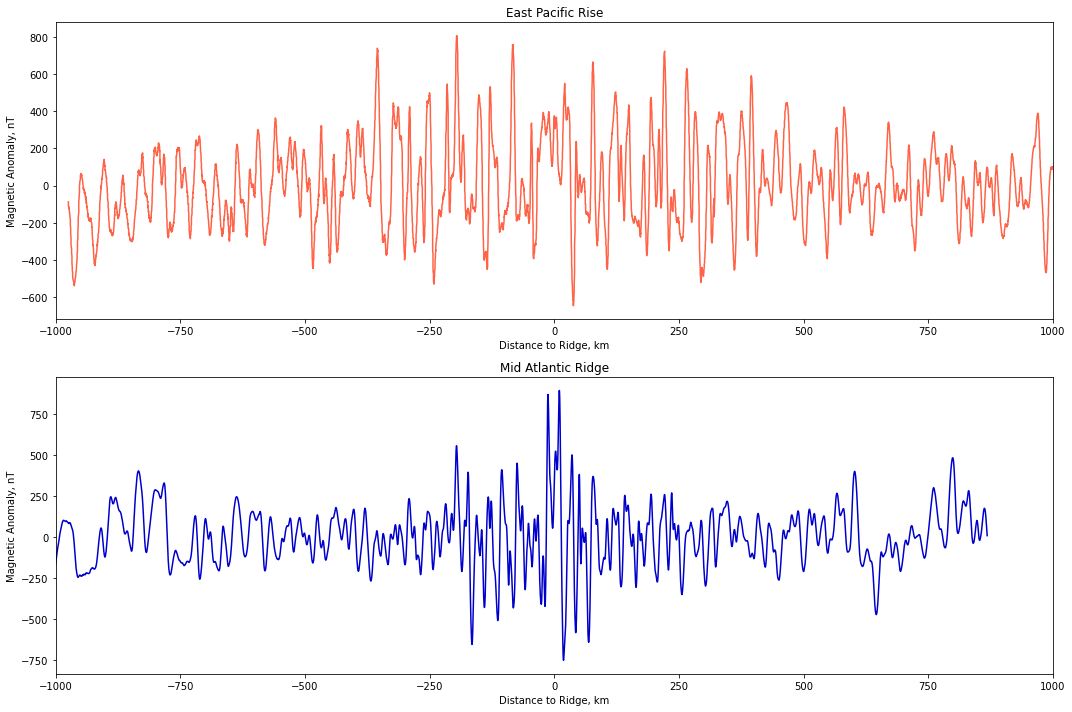

In [19]:
plt.figure(1,(15,10))
ax1 = plt.subplot(2,1,1)
ax1.plot(projected_pacific_data['DIST'],pac_mma,color='tomato'); # plot the pacific marine magnetic anomaly
ax1.set_xlim(-1000, 1000);
ax1.set_xlabel('Distance to Ridge, km');
ax1.set_ylabel('Magnetic Anomaly, nT');
ax1.set_title('East Pacific Rise');

ax2 = plt.subplot(2,1,2)
ax2.plot(projected_atlantic_data['DIST'],atl_mma,color='mediumblue'); # plot the atlantic marine magnetic anomaly
ax2.set_xlim(-1000, 1000);
ax2.set_xlabel('Distance to Ridge, km');
ax2.set_ylabel('Magnetic Anomaly, nT');
ax2.set_title('Mid Atlantic Ridge');

plt.tight_layout()

Plot the marine magnetic anomalies together as subplots again with reference lines at zero nT, and zoom in the `xlim` to $\pm$100 km and add a grid with xticks every 10 km using `ax1.set_xticks(np.arange(-100,100,10))`.

<font color=goldenrod>**_Code for you to write_**</font>

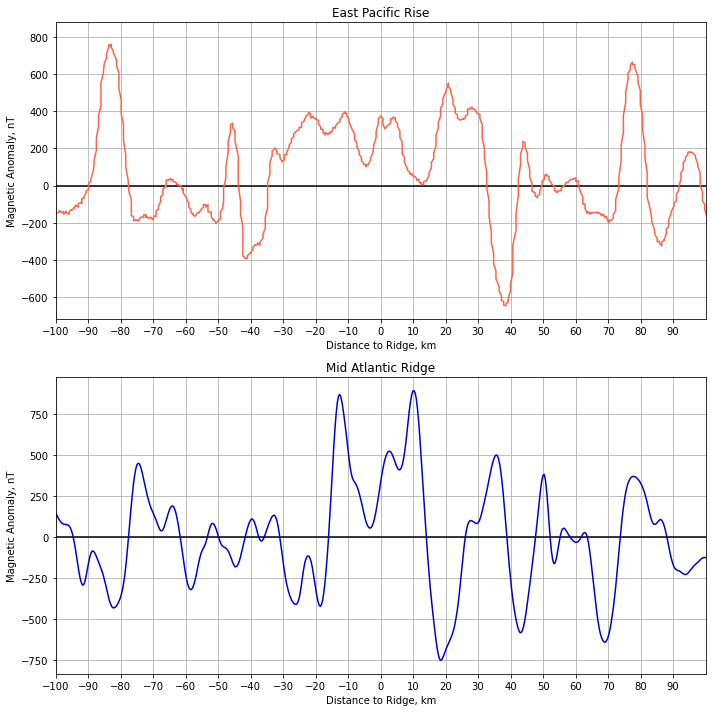

<img src="Figures/marine_mag_anom.png" width=900>
> Source: Fundamentals of Geophysics (2nd Edition) Lowrie, W.

Which wiggles can you match between lines and to the model profile due to the GPTS above? Can you pick the Bruhnes, Matuyama, Gauss, and Gilbet polarity chrons? What distance from the ridge does the Bruhnes-Matuyama reversal (which tells us an age of 776 kyr) occur at for both ridges? Zoom in on your plots and write down the distance to the ridge.

**Write your answer here.**

Define a function that you can use to calculate the spreading rate in km/Myr using the distance from the ridge of the Bruhnes-Matuyama reversal. The function should take the distance to the reversal as input and return a spreading rate. An important piece of information is that the reversal occurred 776,000 years ago (Singer et al. 2019). Make sure that the function has a docstring and that the docstring indicates what units the calculated rate is in.

You can find helpful information about functions here (part of your weekly reading): https://www.inferentialthinking.com/chapters/08/Functions_and_Tables.html

<font color=goldenrod>**_Code for you to write_**</font>

In [23]:
def spread_rate(dist,age):
    """
    Function to compute the spreading rate
    
    parameters
    ----------
    dist:
    age: 
    
    output
    ------
    rate:
    """
    # write your code here
    
    
    return rate

Use your function to compute the spreading rate of the atlantic and pacific ridges. Print the results.

In [24]:
alt_spread_rate = spread_rate(15,0.776)
pac_spread_rate = spread_rate(35,0.776)
print(alt_spread_rate,pac_spread_rate)

19.329896907216494 45.103092783505154


Based on the marine magnetic anomalies, which spreading center do you think is spreading faster the Atlantic (blue) or Pacific (red)? Is that consistent with your estimate from the bathymetry?

**Write your answer here.**

### Turn in this notebook

Save your completed notebook. Click on __File, Print, Save as PDF__ to save the notebook as a LaTex PDF. Upload it to the [bCourses assignment page](https://bcourses.berkeley.edu/courses/1498475/assignments/8150804).